## Yallmotors Linear Regression Model

#### Steps : 

    - Import Dataset 
    - Cleaning 
    - Define x , y
    - Split Dataset [training - test]
    - build and train model 
    - predict the test data
    - evaluate model 
    

### Data manipulation libraries:

In [180]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Visualization libraries:

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
sns.set()

### ML libraries:

In [182]:
from sklearn.model_selection import train_test_split    #data splitting
from sklearn.linear_model import LinearRegression       #build model

### Exploring the data

### Load Dataset


#### Read the `new cars.csv` dataset into an object named `df`

In [183]:
# Load Dataset 
df = pd.read_csv('new cars.csv')

------
### Data Cleaning 

In [184]:
# take alook 
df.head()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2.0,4,180,8 Seater,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,4 Seater,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,5 Seater,honda,ksa


In [185]:
df.sample(20)

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
3315,Renault Symbol 2021 1.6L PE,"OMR 3,900",1.6,4,102,180,5 Seater,renault,oman
4135,Honda HR-V 2021 LX Black Edition,Orangeburst Metallic,1.8,4,141,190,5 Seater,honda,kuwait
130,Porsche Panamera Sport Turismo 2021 Turbo S E-...,"SAR 995,060",4.0,8,680,310,5 Seater,porsche,ksa
1344,Aston Martin Vantage 2021 4.0T V8,"EGP 4,750,000",4000,8,503,314,2 Seater,aston-martin,egypt
5136,Mercedes-Benz Maybach GLS 2021 600 4MATIC,TBD,4.0,8,558,250,4 Seater,mercedes-benz,uae
4138,Ford Bronco 2021 2.3T Big Bend,TBD,2.3,4,420,4 Seater,7.5,ford,kuwait
1225,Hyundai Accent 2021 (RB) 1.6L GL DAB (ABS),"EGP 237,900",1591,4,125,184,5 Seater,hyundai,egypt
6237,Nissan GT-R 2021 Nismo,"AED 787,809",3.8,6,600,350,4 Seater,nissan,uae
2580,Isuzu D-MAX 2021 3.0L Crew Cab 4WD LS,"QAR 97,500",3.0,4,190,170,5 Seater,isuzu,qatar
152,McLaren 570 GT 2021 3.8T Coupe,DISCONTINUED,3.8,8,562,328,2 Seater,mclaren,ksa


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB


In [187]:
df.dtypes

car name           object
price              object
engine_capacity    object
cylinder           object
horse_power        object
top_speed          object
seats              object
brand              object
country            object
dtype: object

In [188]:
# convert column types
df['cylinder']  = pd.to_numeric(df['cylinder'], errors='coerce')
df['horse_power']  = pd.to_numeric(df['horse_power'], errors='coerce')
df['top_speed']  = pd.to_numeric(df['top_speed'], errors='coerce')

In [189]:
df.isnull().sum()

car name             0
price                0
engine_capacity      0
cylinder           734
horse_power        122
top_speed          433
seats                0
brand                0
country              0
dtype: int64

In [190]:
df.shape

(6308, 9)

In [191]:

df['price'] = df.price.str.replace('SAR','')
df['price'] = df.price.str.replace('AED','')
df['price'] = df.price.str.replace('QAR','')
df['price'] = df.price.str.replace('KWD','')
df['price'] = df.price.str.replace('BHD','')
df['price'] = df.price.str.replace('OMR','')
df['price'] = df.price.str.replace('EGP','')
df['price'] = df.price.str.replace(',','')
df['engine_capacity'] = df.engine_capacity.str.replace('.','')
df['seats'] = df.seats.str.replace('Seater','')
df['seats'] = df.seats.str.replace('N A','')



In [192]:
df.sample(20)

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
5938,Mercedes-Benz A 45 AMG 2021 2.0T 4MATIC,249900,20,4.0,381.0,250.0,5,mercedes-benz,uae
5279,Opel Crossland X 2021 1.2T Enjoy,TBD,12,3.0,110.0,187.0,5,opel,uae
3617,Mercedes-Benz C-Class 2021 C 200,15700,20,NaN,204.0,245.0,5,mercedes-benz,oman
671,Dodge Charger 2021 5.7L R/T Premium,181335,57,8.0,370.0,250.0,5,dodge,ksa
4877,Audi Q7 2021 45 TFSI Design quattro (333 HP),26500,30,6.0,333.0,250.0,5,audi,kuwait
4756,Mercedes-Benz E-Class Cabriolet 2021 E 200,17800,20,4.0,184.0,235.0,4,mercedes-benz,kuwait
4659,Mercedes-Benz SLC 2021 200,14800,20,NaN,184.0,237.0,2,mercedes-benz,kuwait
212,Hongqi HS5 2021 2.0T Premium (AWD),163900,20,4.0,224.0,210.0,5,hongqi,ksa
1333,BMW X4 2021 xDrive 30i,1500000,1997,4.0,252.0,240.0,5,bmw,egypt
1289,Subaru XV 2021 1.6L Luxury,504900,2000,4.0,114.0,175.0,5,subaru,egypt


In [193]:
df.dtypes

car name            object
price               object
engine_capacity     object
cylinder           float64
horse_power        float64
top_speed          float64
seats               object
brand               object
country             object
dtype: object

In [194]:
df['price']  = pd.to_numeric(df['price'], errors='coerce')
df['seats']  = pd.to_numeric(df['seats'], errors='coerce')
df['engine_capacity']  = pd.to_numeric(df['engine_capacity'], errors='coerce')

In [195]:
df.sample(15)

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
5465,Changan CS95 2022 2.0T Royal (7-Seater) AWD,130000.0,20.0,4.0,233.0,190.0,7.0,changan,uae
2856,Audi A5 Sportback 2021 45 TFSI Design quattro ...,209000.0,20.0,4.0,252.0,250.0,5.0,audi,qatar
1175,Hyundai i20 2021 1.4L Spirit,267000.0,1396.0,4.0,98.0,180.0,5.0,hyundai,egypt
4854,Porsche Cayenne 2021 E-Hybrid,NaN,30.0,6.0,462.0,253.0,5.0,porsche,kuwait
5550,Abarth 695 2021 1.4T Rivale (Hard-Top),120000.0,14.0,4.0,180.0,225.0,4.0,abarth,uae
4907,Audi RS5 Cabriolet 2021 4.2 (450 HP),29000.0,42.0,8.0,450.0,250.0,4.0,audi,kuwait
5608,Peugeot Traveller 2021 L3 VIP,139900.0,20.0,4.0,180.0,NaN,8.8,peugeot,uae
4304,Skoda Octavia A8 2021 1.4 TSI Ambition,6100.0,14.0,4.0,150.0,220.0,5.0,skoda,kuwait
1698,Kia Cadenza 2021 3.3L GDi Top,NaN,33.0,6.0,284.0,235.0,5.0,kia,bahrain
1926,Audi A3 Sedan 2021 RS3 (400 HP),11900.0,25.0,5.0,394.0,280.0,5.0,audi,bahrain


In [196]:
df.dtypes

car name            object
price              float64
engine_capacity    float64
cylinder           float64
horse_power        float64
top_speed          float64
seats              float64
brand               object
country             object
dtype: object

In [197]:
df.isnull().sum()

car name              0
price              1329
engine_capacity       3
cylinder            734
horse_power         122
top_speed           433
seats               116
brand                 0
country               0
dtype: int64

In [198]:
df['price'].fillna(df['price'].mean(), inplace=True)
df['cylinder'].fillna(df['cylinder'].mode()[0], inplace=True)
df['horse_power'].fillna(df['horse_power'].mode()[0], inplace=True)
df['top_speed'].fillna(df['top_speed'].mode()[0], inplace=True)
df['seats'].fillna(df['seats'].mode()[0], inplace=True)

In [199]:
df.head(10)

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,200455.127134,0.0,4.0,150.0,250.0,150.0,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,140575.000000,20.0,4.0,180.0,250.0,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,98785.000000,15.0,4.0,102.0,145.0,4.0,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,198000.000000,23.0,4.0,420.0,250.0,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,200455.127134,18.0,4.0,140.0,190.0,5.0,honda,ksa
5,Honda HR-V 2021 1.8 i-VTEC EX,95335.000000,18.0,4.0,140.0,190.0,5.0,honda,ksa
6,Peugeot Expert 2021 Van L3 A/T,82845.000000,20.0,4.0,120.0,170.0,5.0,peugeot,ksa
7,Peugeot Expert 2021 Van L3 M/T,76545.000000,20.0,4.0,120.0,170.0,5.0,peugeot,ksa
8,Renault Koleos 2021 2.5L LE (4WD),116900.000000,25.0,4.0,170.0,199.0,5.0,renault,ksa
9,Ford Bronco 2021 2.7T Outer Banks,238000.000000,27.0,6.0,542.0,250.0,6.9,ford,ksa


In [200]:
 # Sum total of the null values 
df.isnull().sum().sum()

3

In [201]:
df.shape

(6308, 9)

In [202]:
# check for null values 
df.isnull().sum()

car name           0
price              0
engine_capacity    3
cylinder           0
horse_power        0
top_speed          0
seats              0
brand              0
country            0
dtype: int64

In [203]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6303    False
6304    False
6305    False
6306    False
6307    False
Length: 6308, dtype: bool

In [204]:
df.duplicated().sum()

16

In [205]:
df[df.duplicated()]

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
1128,Mercedes-Benz C-Class 2022 C 300,200455.127134,1991.0,4.0,255.0,209.0,5.0,mercedes-benz,egypt
1591,Toyota Yaris Sedan 2021 1.5L SE,6200.000000,15.0,4.0,105.0,175.0,5.0,toyota,bahrain
3546,Nissan Pathfinder 2022 3.5L S 2WD,200455.127134,35.0,6.0,271.0,190.0,7.0,nissan,oman
4676,Mercedes-Benz C-Class 2022 C 300,200455.127134,20.0,4.0,255.0,209.0,5.0,mercedes-benz,kuwait
5296,Renault Megane 2021 1.6L LE,70500.000000,16.0,4.0,115.0,180.0,5.0,renault,uae
5338,Renault Megane 2021 2.0L LE,73500.000000,20.0,4.0,140.0,207.0,5.0,renault,uae
5435,Toyota Camry 2021 2.5L S (204 HP),95500.000000,25.0,4.0,204.0,195.0,5.0,toyota,uae
5455,Opel Grandland X 2021 1.6T Innovation,95000.000000,16.0,4.0,163.0,201.0,5.0,opel,uae
5472,Toyota Innova 2021 2.7L SE,99650.000000,27.0,4.0,164.0,170.0,8.0,toyota,uae
5581,Changan CS95 2022 2.0T Royal (7-Seater) AWD,130000.000000,20.0,4.0,233.0,190.0,7.0,changan,uae


In [206]:
df.drop_duplicates(inplace=True)

In [207]:
df[df.duplicated()]

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country


In [208]:
df.head()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,200455.127134,0.0,4.0,150.0,250.0,150.0,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,140575.000000,20.0,4.0,180.0,250.0,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,98785.000000,15.0,4.0,102.0,145.0,4.0,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,198000.000000,23.0,4.0,420.0,250.0,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,200455.127134,18.0,4.0,140.0,190.0,5.0,honda,ksa


In [209]:
df.corr()

,price,engine_capacity,cylinder,horse_power,top_speed,seats
price,1.000000,0.400522,0.238948,0.273334,0.244632,-0.004049
engine_capacity,0.400522,1.000000,0.005435,-0.025712,-0.007930,-0.029851
cylinder,0.238948,0.005435,1.000000,0.675320,0.432364,-0.085181
horse_power,0.273334,-0.025712,0.675320,1.000000,0.540339,-0.100858
top_speed,0.244632,-0.007930,0.432364,0.540339,1.000000,0.039253
seats,-0.004049,-0.029851,-0.085181,-0.100858,0.039253,1.000000


In [210]:
df['country'].value_counts()

uae        1236
ksa         996
kuwait      931
qatar       925
oman        909
bahrain     905
egypt       390
Name: country, dtype: int64

In [211]:
df['brand'].value_counts()

mercedes-benz    557
audi             398
bmw              394
toyota           375
ford             322
                ... 
zna                2
byd                2
soueast            2
bugatti            1
dfm                1
Name: brand, Length: 82, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

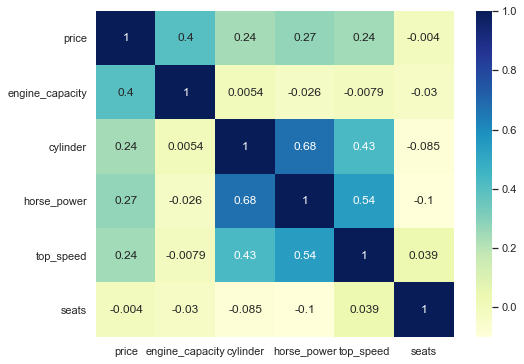

In [212]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show

In [213]:
Top_countries = df.groupby(['country']).size().reset_index(name='counts')
Top_countries

,country,counts
0,bahrain,905
1,egypt,390
2,ksa,996
3,kuwait,931
4,oman,909
5,qatar,925
6,uae,1236


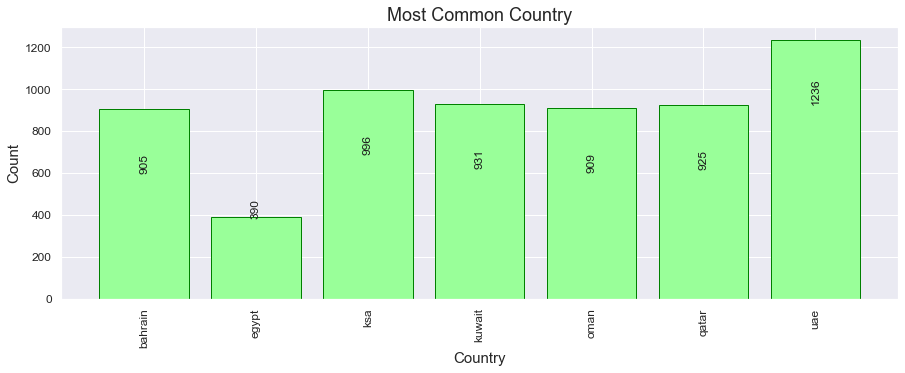

In [214]:
plt.figure(figsize = (15,5)) 
plt.title("Most Common Country", fontsize=18) 
plt.bar(Top_countries["country"], Top_countries["counts"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Country",fontsize=15) 
plt.ylabel("Count",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_countries["counts"].items(): 
    if v > 800 : 
        plt.text(k,v-300,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [215]:
Top_brands = df.groupby(['brand']).size().reset_index(name='counts').sort_values('counts',ascending=False).head(10)
Top_brands

,brand,counts
55,mercedes-benz,557
5,audi,398
9,bmw,394
77,toyota,375
26,ford,322
63,porsche,303
60,nissan,286
17,chevrolet,266
47,lexus,238
35,hyundai,228


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

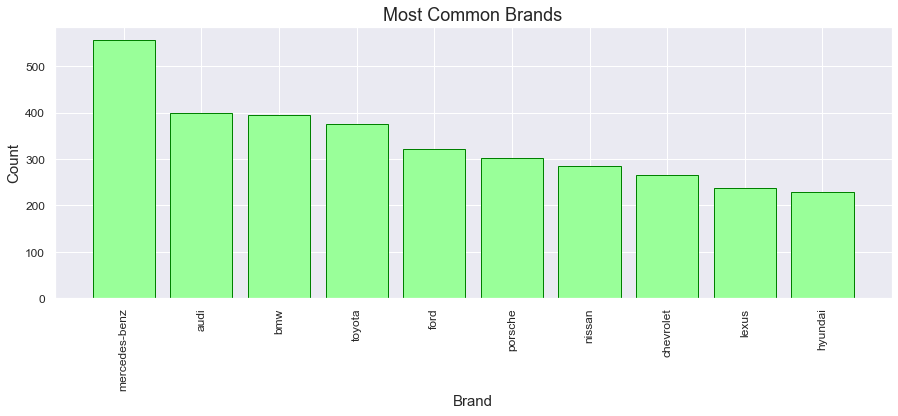

In [216]:
plt.figure(figsize = (15,5)) 
plt.title("Most Common Brands", fontsize=18) 
plt.bar(Top_brands["brand"], Top_brands["counts"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Brand",fontsize=15) 
plt.ylabel("Count",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

#for k,v in Top_brands["counts"].items(): 
        #plt.text(k,v,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

<AxesSubplot:xlabel='country', ylabel='brand'>

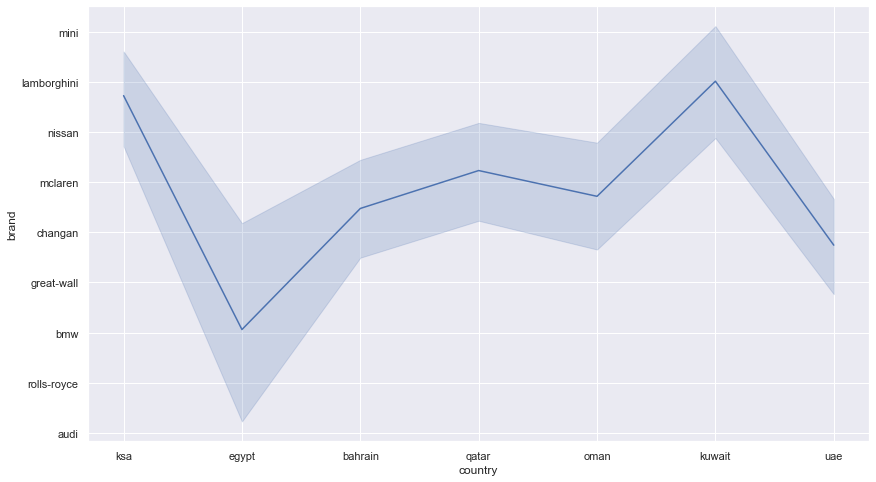

In [217]:
sns.lineplot(data=df, x="country", y="brand") 

In [218]:
df.describe()

,price,engine_capacity,cylinder,horse_power,top_speed,seats
count,6.292000e+03,6289.000000,6292.000000,6292.000000,6292.000000,6292.000000
mean,2.005875e+05,151.453172,5.231723,289.682454,223.606643,7.548522
std,4.409022e+05,540.065249,1.822611,179.054198,46.357048,21.773416
min,2.899000e+03,0.000000,3.000000,12.000000,120.000000,2.000000
25%,2.660000e+04,20.000000,4.000000,164.000000,188.000000,5.000000
50%,1.306000e+05,27.000000,4.000000,252.000000,220.000000,5.000000
75%,2.004551e+05,40.000000,6.000000,367.000000,250.000000,5.000000
max,1.331480e+07,6752.000000,16.000000,5050.000000,966.000000,260.000000


----
### Deal With Outliyers 

<AxesSubplot:xlabel='price', ylabel='Density'>

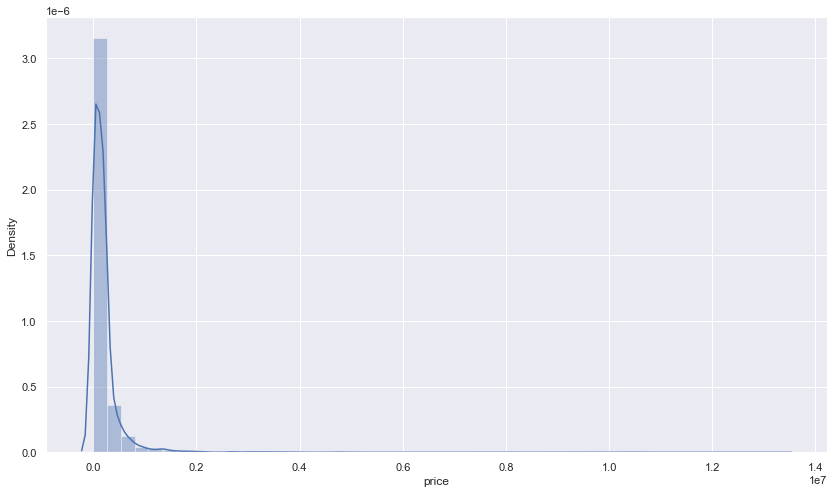

In [219]:
sns.distplot(df['price'])

In [220]:
q = df['price'].quantile(0.99)
df = df[df['price']<q]

<AxesSubplot:xlabel='price', ylabel='Density'>

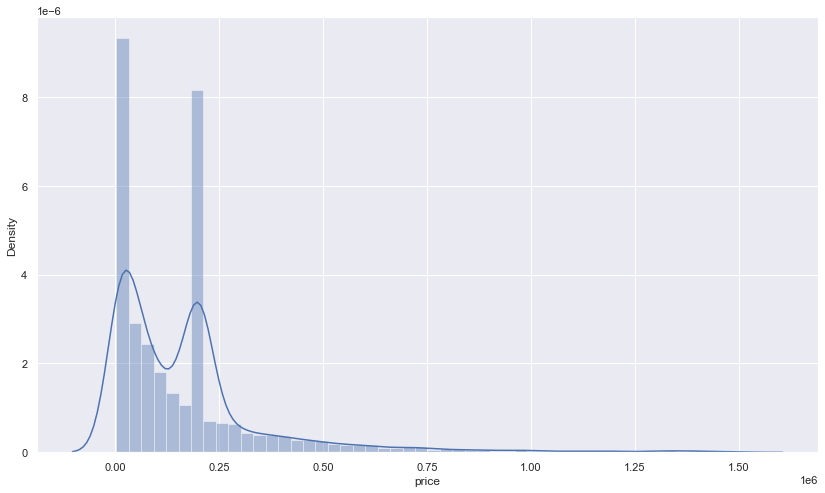

In [221]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

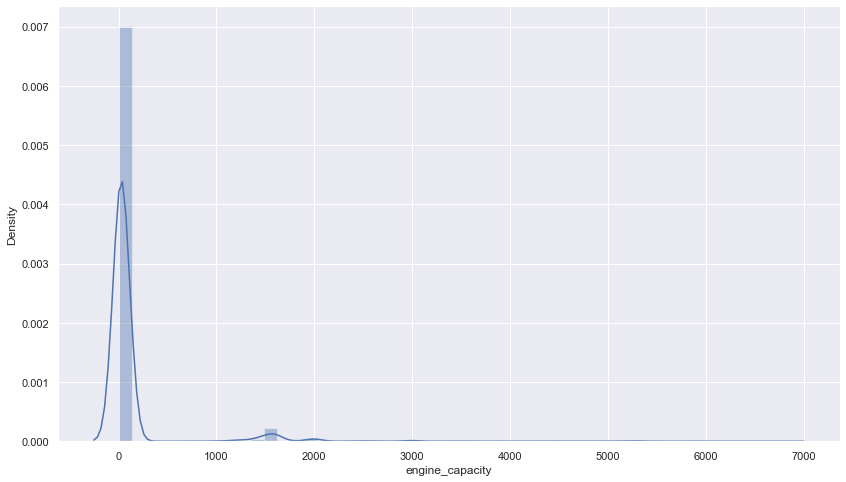

In [222]:
sns.distplot(df['engine_capacity'])

In [223]:
q = df['engine_capacity'].quantile(0.99)
df = df[df['engine_capacity']<q]

<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

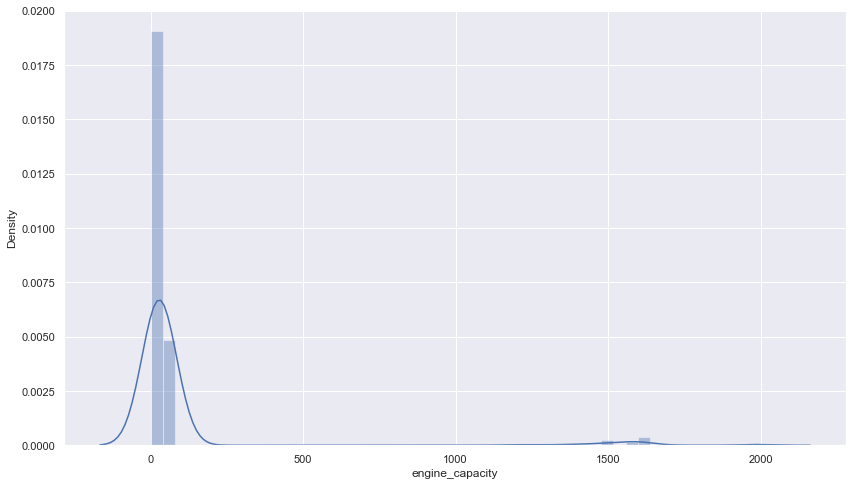

In [224]:
sns.distplot(df['engine_capacity'])

<AxesSubplot:xlabel='cylinder', ylabel='Density'>

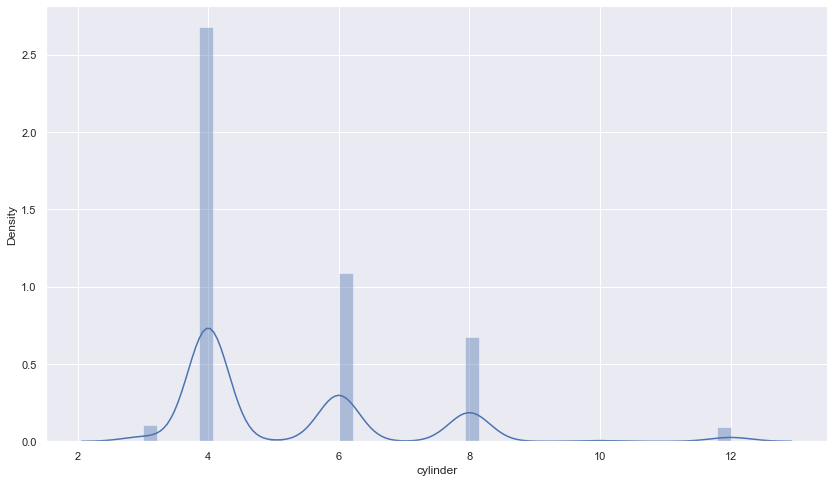

In [225]:
sns.distplot(df['cylinder'])

In [226]:
q = df['cylinder'].quantile(0.99)
df = df[df['cylinder']<q]

<AxesSubplot:xlabel='cylinder', ylabel='Density'>

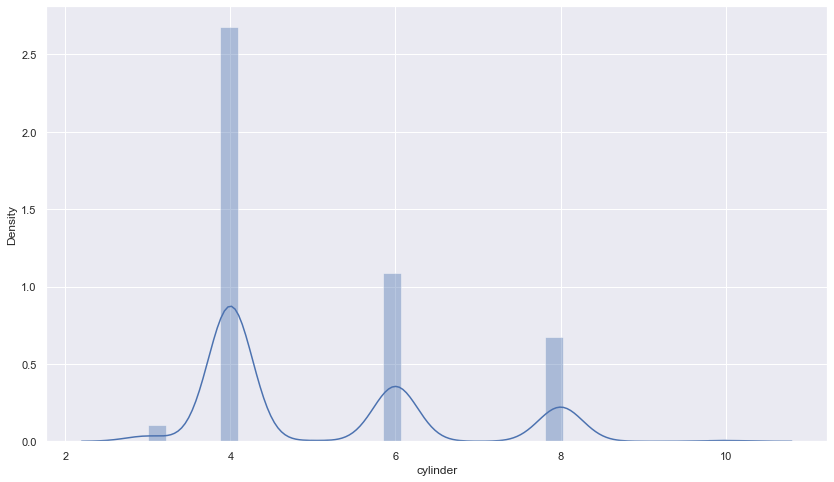

In [227]:
sns.distplot(df['cylinder'])

<AxesSubplot:xlabel='horse_power', ylabel='Density'>

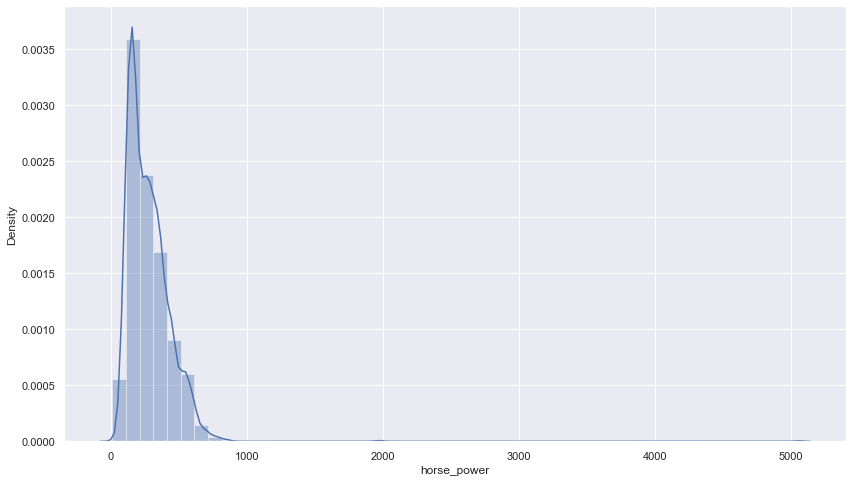

In [228]:
sns.distplot(df['horse_power'])

In [229]:
q = df['horse_power'].quantile(0.99)
df = df[df['horse_power']<q]

<AxesSubplot:xlabel='horse_power', ylabel='Density'>

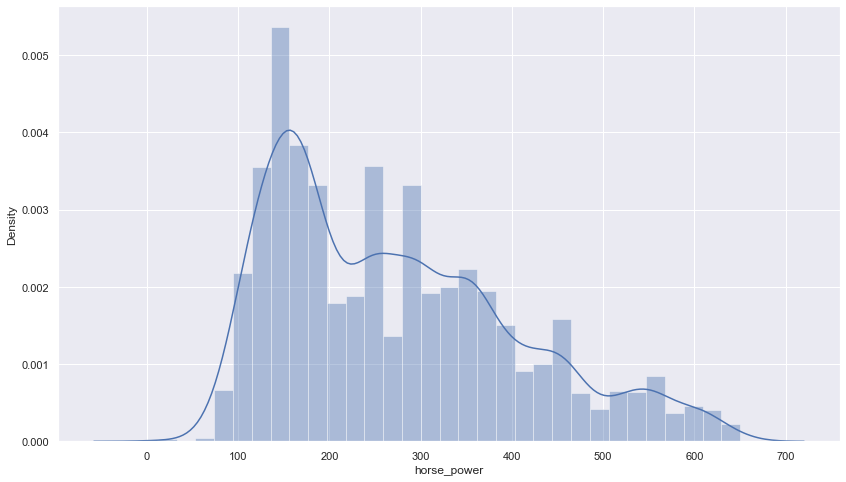

In [230]:
sns.distplot(df['horse_power'])

<AxesSubplot:xlabel='top_speed', ylabel='Density'>

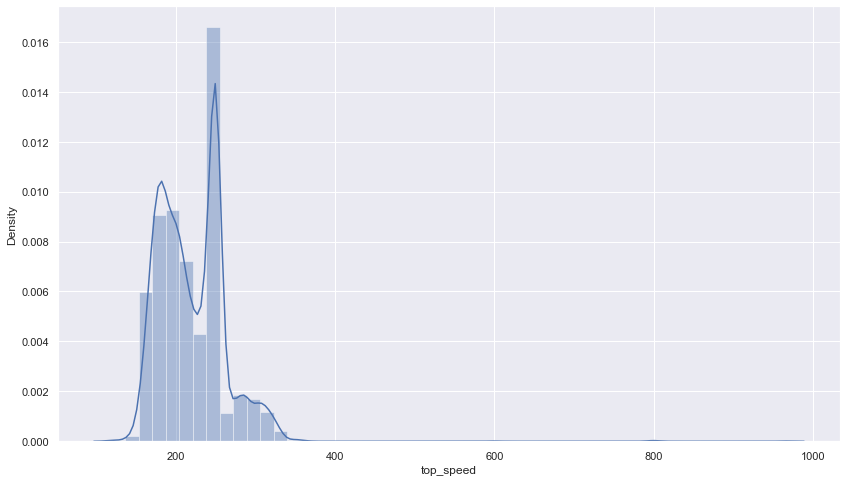

In [231]:
sns.distplot(df['top_speed'])  

In [232]:
q = df['top_speed'].quantile(0.99)
df = df[df['top_speed']<q]

<AxesSubplot:xlabel='top_speed', ylabel='Density'>

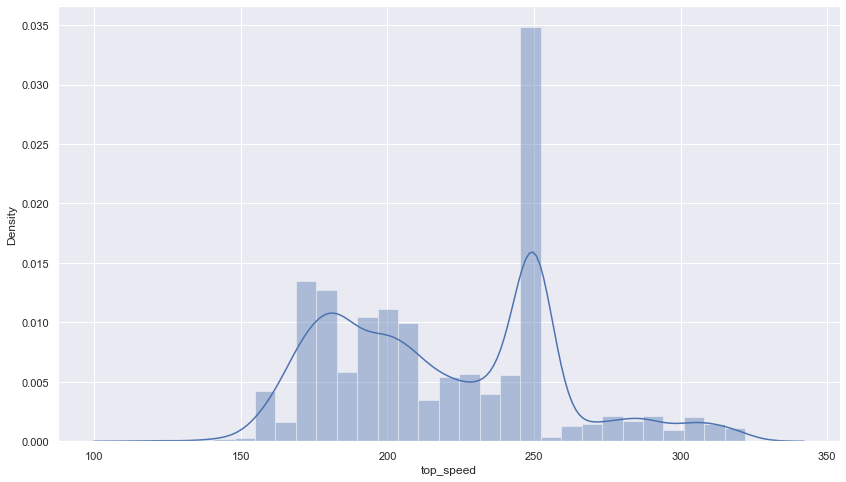

In [233]:
sns.distplot(df['top_speed'])  

<AxesSubplot:xlabel='seats', ylabel='Density'>

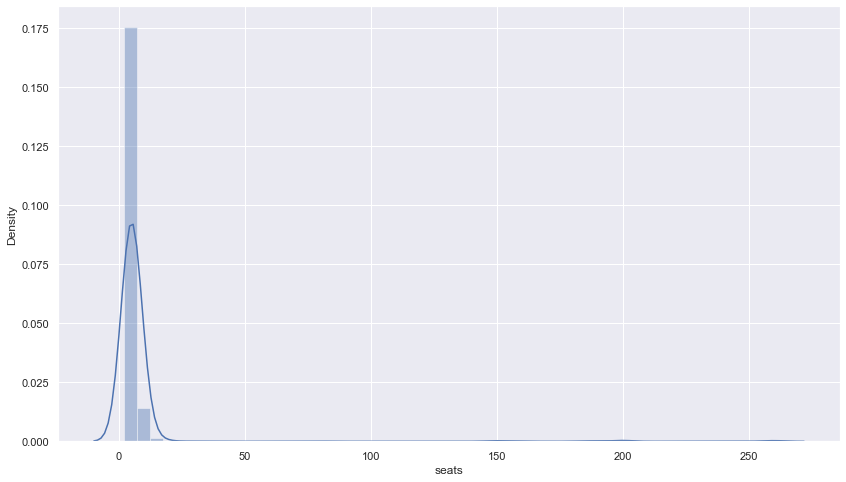

In [234]:
 sns.distplot(df['seats'])   

In [235]:
q = df['seats'].quantile(.99)
df = df[df['seats']<q]

<AxesSubplot:xlabel='seats', ylabel='Density'>

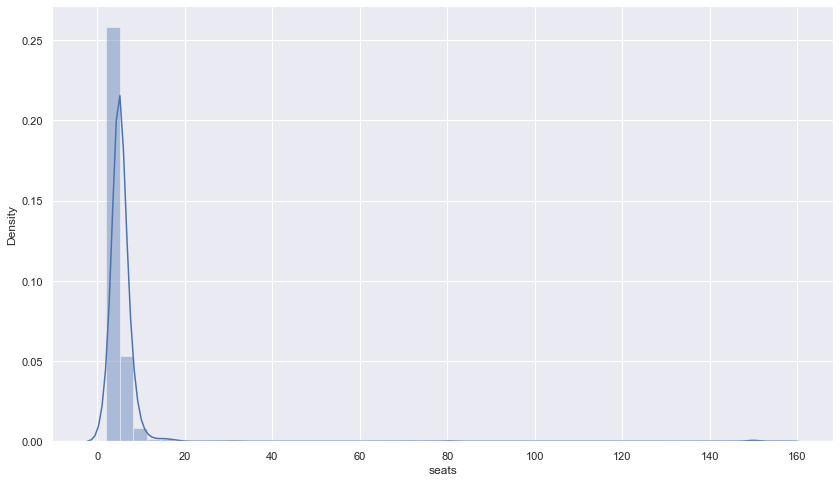

In [236]:
 sns.distplot(df['seats'])   

In [237]:
df.describe()

,price,engine_capacity,cylinder,horse_power,top_speed,seats
count,5.835000e+03,5835.000000,5835.000000,5835.000000,5835.000000,5835.00000
mean,1.554100e+05,99.402571,5.015596,270.421937,218.770009,5.69635
std,1.724503e+05,324.787140,1.473197,129.835773,38.174723,7.97370
min,2.899000e+03,0.000000,3.000000,65.000000,120.000000,2.00000
25%,2.349750e+04,20.000000,4.000000,164.000000,185.000000,5.00000
50%,1.146400e+05,25.000000,4.000000,250.000000,212.000000,5.00000
75%,2.004551e+05,36.000000,6.000000,355.000000,250.000000,5.00000
max,1.500000e+06,1997.000000,10.000000,650.000000,322.000000,156.00000


------
## Linear Regression 

In [238]:
df = pd.get_dummies(df, prefix=None,drop_first=True)
df.head()

,price,engine_capacity,cylinder,horse_power,top_speed,seats,car name_Abarth 595 2021 1.4T Competizione (Convertible),car name_Abarth 595 2021 1.4T Competizione (Hard-Top),car name_Abarth 695 2021 1.4T Rivale (Convertible),car name_Abarth 695 2021 1.4T Rivale (Hard-Top),...,brand_volkswagen,brand_volvo,brand_zna,brand_zotye,country_egypt,country_ksa,country_kuwait,country_oman,country_qatar,country_uae
0,200455.127134,0.0,4.0,150.0,250.0,150.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,140575.000000,20.0,4.0,180.0,250.0,8.8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,98785.000000,15.0,4.0,102.0,145.0,4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,198000.000000,23.0,4.0,420.0,250.0,7.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,200455.127134,18.0,4.0,140.0,190.0,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [239]:
df.head()

,price,engine_capacity,cylinder,horse_power,top_speed,seats,car name_Abarth 595 2021 1.4T Competizione (Convertible),car name_Abarth 595 2021 1.4T Competizione (Hard-Top),car name_Abarth 695 2021 1.4T Rivale (Convertible),car name_Abarth 695 2021 1.4T Rivale (Hard-Top),...,brand_volkswagen,brand_volvo,brand_zna,brand_zotye,country_egypt,country_ksa,country_kuwait,country_oman,country_qatar,country_uae
0,200455.127134,0.0,4.0,150.0,250.0,150.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,140575.000000,20.0,4.0,180.0,250.0,8.8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,98785.000000,15.0,4.0,102.0,145.0,4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,198000.000000,23.0,4.0,420.0,250.0,7.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,200455.127134,18.0,4.0,140.0,190.0,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


-----
### Define x , y

In [240]:
x = df.drop(['price'],axis=1).values
y = df['price'].values

In [241]:
x

array([[  0.,   4., 150., ...,   0.,   0.,   0.],
       [ 20.,   4., 180., ...,   0.,   0.,   0.],
       [ 15.,   4., 102., ...,   0.,   0.,   0.],
       ...,
       [ 68.,   8., 505., ...,   0.,   0.,   1.],
       [ 68.,   8., 505., ...,   0.,   0.,   1.],
       [ 68.,   8., 530., ...,   0.,   0.,   1.]])

In [242]:
y

array([200455.12713396, 140575.        ,  98785.        , ...,
       200455.12713396, 200455.12713396, 200455.12713396])

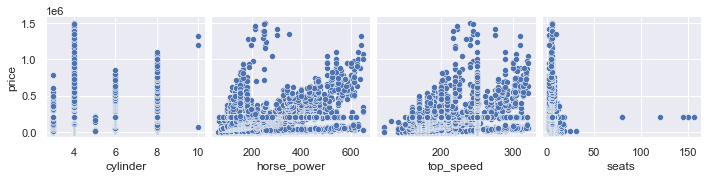

In [243]:
sns.pairplot(df,x_vars=['cylinder','horse_power','top_speed','seats'],y_vars='price')

-----
### Split Dataset [training - test]

In [244]:
# divid into train and test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [245]:
# Scalers 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

---
### Train Model

In [246]:
my_model = LinearRegression()
my_model.fit(x_train , y_train)

LinearRegression()

In [247]:
my_model.coef_

array([ 1.08169373e+03,  3.49351536e+11, -8.49038533e+04, ...,
        1.41611719e+03,  1.71057102e+05,  1.64658656e+05])

In [248]:
my_model.intercept_

7686753418200.406

------
### Predict Value

In [249]:
# predicated Value
y_predict = my_model.predict(x_test[:5])
y_predict

array([ 4.23699277e+04,  2.76144002e+05,  1.46084229e+05,  2.17597370e+05,
       -4.01860484e+12])

In [250]:
# real value
y_test[:5]

array([ 23000.        , 200455.12713396, 200455.12713396, 200455.12713396,
       414900.        ])

-----
### Regression Score

In [251]:
train_data_score = my_model.score(x_train , y_train) 
test_data_score = my_model.score(x_test,y_test)

print(train_data_score)
print(test_data_score)

0.822252194231863
-1.3977746915132244e+16


----
## Evaluate 

In [252]:
from sklearn.metrics import r2_score
y_pred = my_model.predict(x_test)
r2_score(y_test , y_pred)

-1.3977746915132244e+16

Text(0, 0.5, 'Predicted Data')

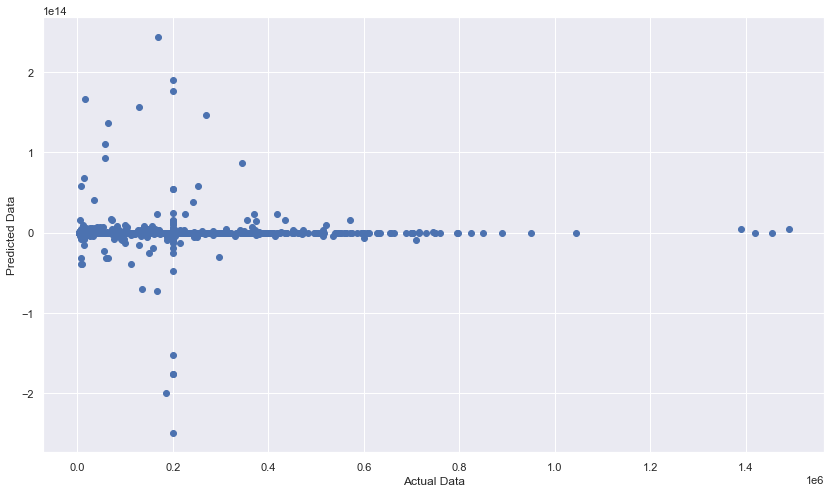

In [253]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

---------
## Decision Tree

In [254]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=4)
DT_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [255]:
y_predict_dt = DT_model.predict(x_test)
y_predict_dt

array([ 39717.23549309, 129533.8170184 ,  32728.56691055, ...,
       129533.8170184 , 328073.70999432, 129533.8170184 ])

In [256]:
y_test

array([ 23000.        , 200455.12713396, 200455.12713396, ...,
         8495.        , 294000.        , 242739.        ])

In [257]:
## Score
train_data_score_dt = DT_model.score(x_train , y_train)
test_data_score_dt = DT_model.score(x_test , y_test)

print(train_data_score_dt)
print(test_data_score_dt)

0.46481448053351393
0.5129039492480003


----------
## Lasso 

In [258]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
from numpy import std

lasso_model = Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lasso_model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 76061.922 (4464.936)


In [259]:
lasso_model.fit(x, y)

Lasso()

In [261]:
## Score
train_data_score_ls = lasso_model.score(x_train , y_train)
test_data_score_ls = lasso_model.score(x_test , y_test)

print(train_data_score_ls)
print(test_data_score_ls)

0.8076297971106696
0.8179052681781303


------
##  Ridge

In [262]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, Lasso

rl = Ridge(alpha=1)
rl.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [263]:
rl_train = rl.score(X_train_scaled, y_train)
rl_test = rl.score(X_test_scaled, y_test)

print(f'The Ridge regression train R^2 is: {rl_train}')
print(f'The Ridge regression test R^2 is: {rl_test}')

The Ridge regression train R^2 is: 0.822103530552917
The Ridge regression test R^2 is: 0.5881970758518162


----
## Ploynomial 

In [264]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) 

X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

poly_model = LinearRegression()

MemoryError: Unable to allocate 90.0 TiB for an array with shape (4668, 2651323060) and data type float64

In [ ]:
poly_model.fit(X_train_poly, y_train)

In [ ]:
poly_test=poly_model.score(X_test_poly, y_test)
poly_train=poly_model.score(X_train_poly, y_train)

print(f'The polynomial regression train R^2 is: {poly_train}')
print(f'polynomial regression test R^2 is: {poly_test}')